# Data visulization with public COVID-19 data
### Keywords: COVID-19, Google Colab, Python, Matplotlib, seaborn

### Tasks:
1. plot confirmed cases each day in the US
2. plot confirmed case for each state AND only the top-10 states
3. plot death counts by sex, age

Use the public COVID-19 data source, provided by [JHU CSSE](https://systems.jhu.edu/research/public-health/ncov/), [CDC](https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-S/9bhg-hcku/data). 

The data are exported from:
1. CSSE Github repository: https://github.com/CSSEGISandData/COVID-19. 
2. CDC:https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-S/9bhg-hcku/data

For the purpose of learning programming. No commercial interests are declared. 

# Step 0: Import libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Task 1: Plot confirmed cases each day



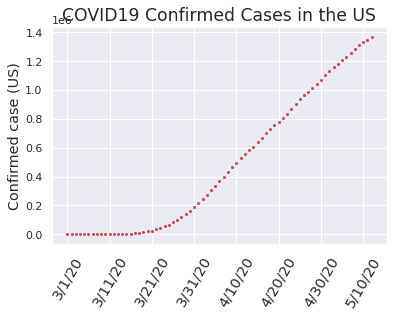

In [118]:
# read the csv data as pandas DataFrame
# Before start
# 1. download the csv file from https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
# 2. drag and drop it to COLAB workspace
# 3. set the file path below
covid19_confirmed_us_path = r"/content/time_series_covid19_confirmed_US.csv"
covid19_confirmed_us_data = pd.read_csv(covid19_confirmed_us_path, error_bad_lines=False, delimiter = ',')
starting_date             = '3/1/20' # flat curve before March

#Obtain the headers
columns_title = covid19_confirmed_us_data.columns.values.tolist()
start_idx     = columns_title.index(starting_date)

# Obtain the value from starting date
cases_along_date = covid19_confirmed_us_data[columns_title[start_idx:]]
# Plot the data
fig, ax = plt.subplots()
# sum all the numbers across states for each day
plt.plot(range(cases_along_date.shape[1]), cases_along_date.sum(), 'ro', markersize = 2)
# alternative 1: bar plot
# plt.bar(range(cases_along_date.shape[1]), cases_along_date.sum())
# alternative 2: stem plot
# plt.bar(range(cases_along_date.shape[1]), cases_along_date.sum())

plt.ylabel('Confirmed case (US)', fontsize = 'large')
plt.xticks(range(0, cases_along_date.shape[1], 10), columns_title[start_idx:-1:10], 
           rotation = 60, fontsize = 'large') # show x-label every 10 days
plt.title('COVID19 Confirmed Cases in the US', fontsize = 'x-large')
plt.show()

# Task 2: Plot confirmed cases for each state

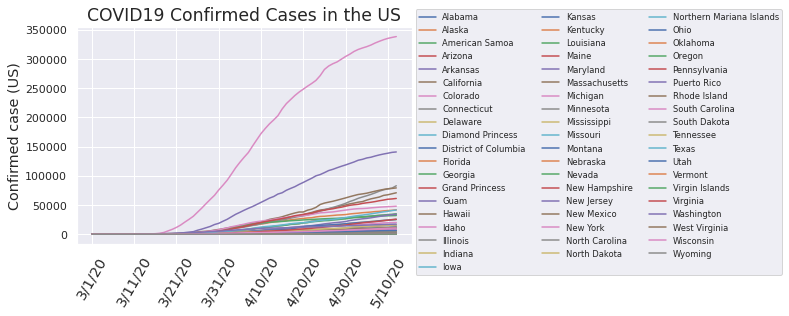

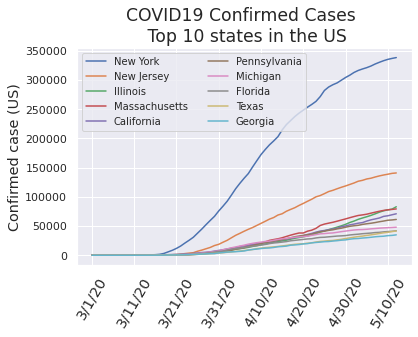

In [142]:
# group confirmed cases along states
cases_along_date_by_state = covid19_confirmed_us_data.groupby(['Province_State']).sum()
# obtain the state names
state_names = cases_along_date_by_state.index.values.tolist()

tt = range(cases_along_date.shape[1])
# interate each state and plot the data
for index, row in cases_along_date_by_state.iterrows():
    plt.plot(tt, row[columns_title[start_idx:]])

# format the figures

# add legends
# use bbox_to_anchor to reposition the legend box (outside plot axes).
plt.legend(state_names, loc = 'upper left', fontsize = 'x-small', ncol = 3, bbox_to_anchor=(1, 1.1))
plt.ylabel('Confirmed case (US)', fontsize = 'large')
plt.xticks(range(0, cases_along_date.shape[1], 10), columns_title[start_idx:-1:10], 
           rotation = 60, fontsize = 'large') # show x-label every 10 days
plt.title('COVID19 Confirmed Cases in the US', fontsize = 'x-large')
plt.show()

# Too many states to be shown on a single figure
# So we sort the number of cases on only plot the top 10 states
cases_along_date_by_state_sorted = cases_along_date_by_state.sort_values(by = ['5/12/20'], ascending = 0)
state_names_sorted = cases_along_date_by_state_sorted.index.values.tolist()

# interate the top 10 states and plot the data
for index, row in cases_along_date_by_state_sorted[0:10].iterrows():
    plt.plot(tt, row[columns_title[start_idx:]])

# format the figures

# add legends
plt.legend(state_names_sorted, loc = 'upper left', fontsize = 'small', ncol = 2)
plt.ylabel('Confirmed case (US)', fontsize = 'large')
plt.xticks(range(0, cases_along_date.shape[1], 10), columns_title[start_idx:-1:10], 
           rotation = 60, fontsize = 'large') # show x-label every 10 days
plt.title('COVID19 Confirmed Cases \n Top 10 states in the US', fontsize = 'x-large')
plt.show()

# Task 3: plot death counts by sex, age

In [0]:
# read the csv data as pandas DataFrame
# Before start
# 1. export the csv file from https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-S/9bhg-hcku/data
# 2. drag and drop it to Colab workspace
# 3. set the file path below
covid19_death_path = r"/content/Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv"
covid19_death_data = pd.read_csv(covid19_death_path, error_bad_lines=False, delimiter = ',')
covid19_death_data = covid19_death_data.set_index(['State', 'Sex'])

US_All_Sexes = covid19_death_data.loc[('United States', 'All Sexes')]
bar_death_allsexes = sns.catplot(x = 'Age group', y = 'COVID-19 Deaths', kind="bar", data=US_All_Sexes);
bar_death_allsexes.set_xticklabels( rotation=45)
bar_death_allsexes.set_xlabels('')

# the last ',' is criticle here, otherwise index ['Male', 'Female'] will be considered as column names
US_death_by_Sexes = covid19_death_data.loc[('United States', ['Male', 'Female']),]

bar_death_by_sex = sns.catplot(x = 'Age group', y = 'COVID-19 Deaths', hue = 'Sex', kind="bar", data=US_death_by_Sexes);
bar_death_by_sex.set_xticklabels(rotation=45)
bar_death_by_sex.set_xlabels('')